## Regularized Logistic Regression
    Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected. To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = 'ex2data2.txt'
df = pd.read_csv(path, header=None, names=['Test1', 'Test2', 'Accepted'])
df.head()

,Test1,Test2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [3]:
df.describe()

,Test1,Test2,Accepted
count,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525
std,0.496654,0.519743,0.502060
min,-0.830070,-0.769740,0.000000
25%,-0.372120,-0.254385,0.000000
50%,-0.006336,0.213455,0.000000
75%,0.478970,0.646562,1.000000
max,1.070900,1.108900,1.000000


## Plot

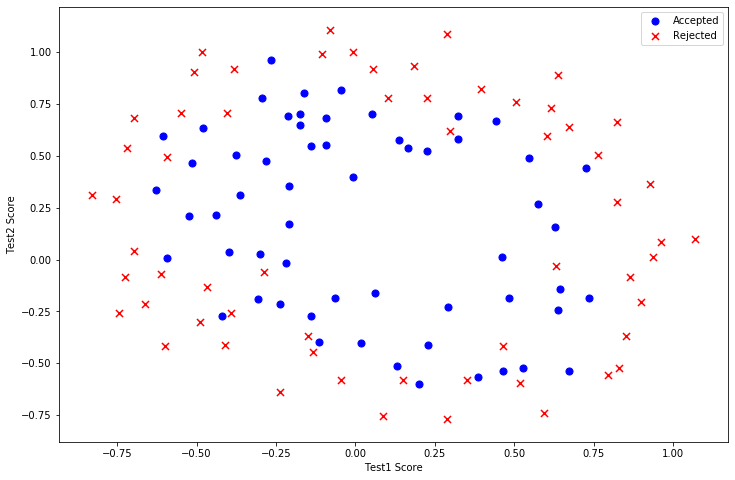

In [4]:
positive = df[df['Accepted'].isin([1])]
negative = df[df['Accepted'].isin([0])]

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(positive['Test1'], positive['Test2'], s=50, c='b', marker='o', label='Accepted')
ax.scatter(negative['Test1'], negative['Test2'], s=50, c='r', marker='x', label='Rejected')
ax.legend()
ax.set_xlabel('Test1 Score')
ax.set_ylabel('Test2 Score')
plt.show()

## Feature Mapping
![](img/feature_map.png)

In [5]:
def feature_mapping(x, y, power, as_ndarray=False):
    data = {'f{0}{1}'.format(i-p, p): np.power(x, i-p) * np.power(y, p)
                for i in range(0, power+1)
                for p in range(0, i+1)
           }
    if as_ndarray:
        return pd.DataFrame(data).values
    else:
        return pd.DataFrame(data)

In [6]:
x1 = df.Test1.values
x2 = df.Test2.values
Y = df.Accepted

In [7]:
data = feature_mapping(x1, x2, power=6)
# data = data.sort_index(axis=1, ascending=True)
data.head()

,f00,f10,f01,f20,f11,f02,f30,f21,f12,f03,...,f23,f14,f05,f60,f51,f42,f33,f24,f15,f06
0,1.0,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,0.342354,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,1.0,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,0.321335,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,1.0,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,0.331733,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,1.0,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,0.126650,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,1.0,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,0.100960,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


In [8]:
data.describe()

,f00,f10,f01,f20,f11,f02,f30,f21,f12,f03,...,f23,f14,f05,f60,f51,f42,f33,f24,f15,f06
count,118.0,118.000000,118.000000,118.000000,118.000000,118.000000,1.180000e+02,118.000000,118.000000,118.000000,...,118.000000,1.180000e+02,118.000000,1.180000e+02,118.000000,1.180000e+02,118.000000,1.180000e+02,118.000000,1.180000e+02
mean,1.0,0.054779,0.183102,0.247575,-0.025472,0.301370,5.983333e-02,0.030682,0.015483,0.142350,...,0.018278,4.089084e-03,0.115710,7.837118e-02,-0.000703,1.893340e-02,-0.001705,2.259170e-02,-0.006302,1.257256e-01
std,0.0,0.496654,0.519743,0.248532,0.224075,0.284536,2.746459e-01,0.134706,0.150143,0.326134,...,0.058513,9.993907e-02,0.299092,1.938621e-01,0.058271,3.430092e-02,0.037443,4.346935e-02,0.090621,2.964416e-01
min,1.0,-0.830070,-0.769740,0.000040,-0.484096,0.000026,-5.719317e-01,-0.358121,-0.483743,-0.456071,...,-0.142660,-4.830370e-01,-0.270222,6.472253e-14,-0.203971,2.577297e-10,-0.113448,2.418097e-10,-0.482684,1.795116e-14
25%,1.0,-0.372120,-0.254385,0.043243,-0.178209,0.061086,-5.155632e-02,-0.023672,-0.042980,-0.016492,...,-0.001400,-7.449462e-03,-0.001072,8.086369e-05,-0.006381,1.258285e-04,-0.005749,3.528590e-04,-0.016662,2.298277e-04
50%,1.0,-0.006336,0.213455,0.165397,-0.016521,0.252195,-2.544062e-07,0.006603,-0.000039,0.009734,...,0.001026,-8.972096e-09,0.000444,4.527344e-03,-0.000004,3.387050e-03,-0.000005,3.921378e-03,-0.000020,1.604015e-02
75%,1.0,0.478970,0.646562,0.389925,0.100795,0.464189,1.099616e-01,0.086392,0.079510,0.270310,...,0.021148,2.751341e-02,0.113020,5.932959e-02,0.002104,2.090875e-02,0.001024,2.103622e-02,0.001289,1.001215e-01
max,1.0,1.070900,1.108900,1.146827,0.568307,1.229659,1.228137e+00,0.449251,0.505577,1.363569,...,0.287323,4.012965e-01,1.676725,1.508320e+00,0.250577,2.018260e-01,0.183548,2.556084e-01,0.436209,1.859321e+00


## Regularized Cost Function
![](img/regularized_cost.png)

In [9]:
theta = np.zeros(data.shape[1])
X = feature_mapping(x1, x2, power=6, as_ndarray=True)
X.shape, Y.shape, theta.shape

((118, 28), (118,), (28,))

In [10]:
def logistic(z):
    return 1 / (1 + np.exp(-z))

In [11]:
def cost(theta, X, Y):
    first = Y * np.log(logistic(X@theta))
    second = (1 - Y) * np.log(1 - logistic(X@theta))
    return -1 * np.mean(first + second)

In [12]:
def regularized_cost(theta, X, Y, l=1):
    theta_1n = theta[1:]
    regularized_term = l / (2 * len(X)) * np.power(theta_1n, 2).sum()
    return cost(theta, X, Y) + regularized_term

In [13]:
cost(theta, X, Y)

0.6931471805599461

In [14]:
regularized_cost(theta, X, Y, l=1)

0.6931471805599461

## Regularized Gradient
![](img/regularized_gradient.png)

In [15]:
def gradient(theta, X, Y):
    return (1/len(X) * X.T @ (logistic(X@theta) - Y))

In [16]:
def regularized_gradient(theta, X, Y, l=1):
    theta_1n = theta[1:]
    regularized_theta = l / len(X) * theta_1n
#     regularized_theta[0] = 0
    regularized_term = np.concatenate([np.array([0]), regularized_theta])
    
    return  gradient(theta, X, Y) + regularized_term

In [17]:
gradient(theta, X, Y)

array([8.47457627e-03, 1.87880932e-02, 7.77711864e-05, 5.03446395e-02,
       1.15013308e-02, 3.76648474e-02, 1.83559872e-02, 7.32393391e-03,
       8.19244468e-03, 2.34764889e-02, 3.93486234e-02, 2.23923907e-03,
       1.28600503e-02, 3.09593720e-03, 3.93028171e-02, 1.99707467e-02,
       4.32983232e-03, 3.38643902e-03, 5.83822078e-03, 4.47629067e-03,
       3.10079849e-02, 3.10312442e-02, 1.09740238e-03, 6.31570797e-03,
       4.08503006e-04, 7.26504316e-03, 1.37646175e-03, 3.87936363e-02])

In [18]:
regularized_gradient(theta, X, Y)

array([8.47457627e-03, 1.87880932e-02, 7.77711864e-05, 5.03446395e-02,
       1.15013308e-02, 3.76648474e-02, 1.83559872e-02, 7.32393391e-03,
       8.19244468e-03, 2.34764889e-02, 3.93486234e-02, 2.23923907e-03,
       1.28600503e-02, 3.09593720e-03, 3.93028171e-02, 1.99707467e-02,
       4.32983232e-03, 3.38643902e-03, 5.83822078e-03, 4.47629067e-03,
       3.10079849e-02, 3.10312442e-02, 1.09740238e-03, 6.31570797e-03,
       4.08503006e-04, 7.26504316e-03, 1.37646175e-03, 3.87936363e-02])

## Fit parameters

In [19]:
import scipy.optimize as opt

In [20]:
res1 = opt.minimize(fun=cost, x0=theta, args=(X, Y), method='Newton-CG', jac=gradient)
res1

     fun: 0.27292093505477794
     jac: array([ 3.49138756e-04,  2.37071408e-05,  6.96566685e-04,  6.49414162e-04,
        2.84034707e-04,  6.52468455e-04,  2.25311573e-04,  2.49942096e-04,
        3.69046637e-05,  6.25611619e-04,  5.23408154e-04,  1.02407553e-04,
        9.79502468e-05,  2.59334493e-05,  6.49576060e-04,  1.84505467e-04,
        1.59424942e-04,  6.03329306e-05,  5.56450757e-05,  8.41855398e-06,
        6.19483471e-04,  3.65145595e-04,  6.08411730e-05,  1.08030493e-04,
        1.53033741e-05,  3.28760660e-05, -2.13914860e-07,  6.88000398e-04])
 message: "Warning: CG iterations didn't converge.  The Hessian is not positive definite."
    nfev: 12
    nhev: 0
     nit: 11
    njev: 1693
  status: 3
 success: False
       x: array([   3.33114671,   -0.7791951 ,    1.24169761,  -23.3359759 ,
        -10.47715949,    7.63921588,   -2.76249941,   20.49566229,
         34.71482099,   14.01386162,   90.43493386,   26.42523863,
          3.25297168,   -9.50306044,  -46.91924153,

In [21]:
res2 = opt.minimize(fun=regularized_cost, x0=theta, args=(X, Y), method='Newton-CG', jac=regularized_gradient)
res2

     fun: 0.5290027297127117
     jac: array([-4.56192171e-09,  2.54050058e-08,  2.20941736e-08,  1.68710497e-08,
        1.08960069e-08, -4.01871445e-08,  2.78353221e-08,  1.80019274e-08,
        2.20301555e-08, -2.62811115e-08, -2.17497152e-08, -3.87368654e-09,
       -3.18853811e-08,  9.57990463e-09, -6.48495761e-08,  1.05424000e-08,
        1.31449462e-08, -8.68740839e-09, -7.39906624e-09,  1.35313919e-08,
       -5.20955399e-08, -1.56164119e-08,  7.84401656e-10, -1.42766928e-08,
       -5.43992462e-09, -1.48628597e-08,  6.24631387e-09, -5.25402221e-08])
 message: 'Optimization terminated successfully.'
    nfev: 7
    nhev: 0
     nit: 6
    njev: 68
  status: 0
 success: True
       x: array([ 1.27273943,  0.62527161,  1.18108816, -2.01996012, -0.91742451,
       -1.43166352,  0.12400719, -0.3655341 , -0.35723896, -0.17513007,
       -1.4581576 , -0.05098976, -0.61555653, -0.27470671, -1.19281671,
       -0.24218787, -0.2060057 , -0.04473135, -0.27778492, -0.29537789,
       -0.4

In [22]:
l = 1
res3 = opt.minimize(fun=regularized_cost, x0=theta, args=(X, Y, l), method='TNC', jac=regularized_gradient)
res3

     fun: 0.5290027299645028
     jac: array([-2.15095910e-06,  6.79410873e-07, -3.49046089e-07,  8.75971212e-07,
       -4.07285756e-08, -9.33762116e-07, -5.14490745e-07,  1.70577554e-08,
        1.54228062e-08, -9.72709348e-07,  6.96398710e-08,  3.55247551e-08,
       -2.79735595e-07,  1.79712252e-07,  2.33081946e-07,  1.47176480e-07,
       -2.12008221e-07,  6.16734717e-07, -9.26895243e-08, -5.27770259e-08,
       -1.48166464e-06,  2.31319656e-07,  1.80327540e-07, -1.31549833e-07,
       -7.17530311e-08, -4.12246582e-07,  1.66034542e-08, -7.34913791e-07])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 32
     nit: 7
  status: 1
 success: True
       x: array([ 1.27271027,  0.62529965,  1.18111686, -2.01987399, -0.91743189,
       -1.43166929,  0.12393227, -0.36553118, -0.35725404, -0.17516292,
       -1.45817009, -0.05098418, -0.61558556, -0.27469165, -1.19271299,
       -0.24217841, -0.20603301, -0.04466178, -0.27778949, -0.29539514,
       -0.45645982, -1.04319154,  0.027793

## Prediction

In [23]:
def predict(theta, X):
    probability = logistic(X @ theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

## Desicion Boundary

In [24]:
def find_theta(power, l):
    '''
    power: int
        raise x1, x2 to polynomial power
    l: int
        lambda constant for regularization term
    '''
    path = 'ex2data2.txt'
    df = pd.read_csv(path, header=None, names=['Test1', 'Test2', 'Accepted'])
    df.head()

    Y = df.Accepted
    x1 = df.Test1.values
    x2 = df.Test2.values
    X = feature_mapping(x1, x2, power, as_ndarray=True)
    theta = np.zeros(X.shape[1])

    res = opt.minimize(fun=regularized_cost, x0=theta, args=(X, Y, l), method='TNC', jac=regularized_gradient)
    return res.x

In [25]:
def find_decision_boundary(density, power, theta, threshhold):
    t1 = np.linspace(-1, 1.2, density)
    t2 = np.linspace(-1, 1.2, density)
    cordinates = [(x, y) for x in t1 for y in t2]
    x_cord, y_cord = zip(*cordinates)
    mapped_cord = feature_mapping(x_cord, y_cord, power)
    
    pred = mapped_cord.values @ theta.T
    decision = mapped_cord[np.abs(pred) <= threshhold]
    
    return decision.f10, decision.f01

In [26]:
def draw_boundary(power, l):
    density = 1000
    threshhold = 2 * 10**-3
    
    theta = find_theta(power, l)
    x, y = find_decision_boundary(density, power, theta, threshhold)
    x1, y1 = find_decision_boundary(density, power, res1.x, threshhold)
    positive = df[df['Accepted'].isin([1])]
    negative = df[df['Accepted'].isin([0])]

    fig, ax = plt.subplots(figsize=(12, 8))
    ax.scatter(positive['Test1'], positive['Test2'], s=50, c='b', marker='o', label='Accepted')
    ax.scatter(negative['Test1'], negative['Test2'], s=50, c='g', marker='x', label='Rejected')
    ax.scatter(x, y, s=50, c='r', marker='.', label='Regularized Decision Boundary')
    ax.scatter(x1, y1, s=50, c='y', marker='.', label='Decision Boundary')
    ax.legend()
    ax.set_xlabel('Test1 Score')
    ax.set_ylabel('Test2 Score')

    plt.show()

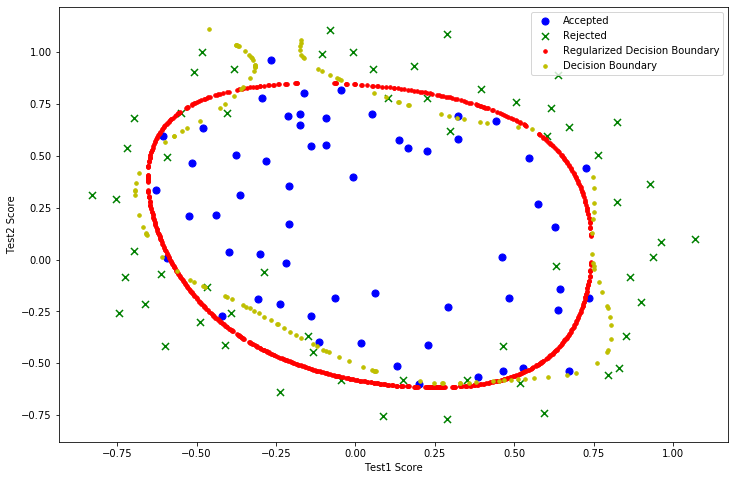

In [27]:
draw_boundary(6, l=1)

## Overfitting

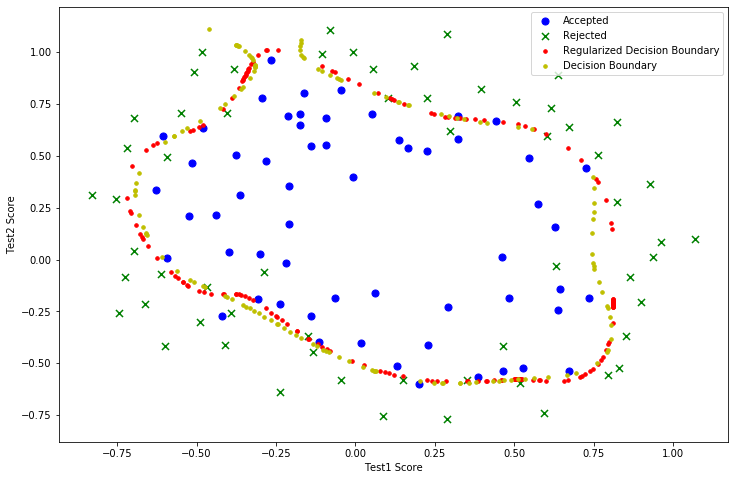

In [28]:
draw_boundary(6, l=0)

## Underfitting

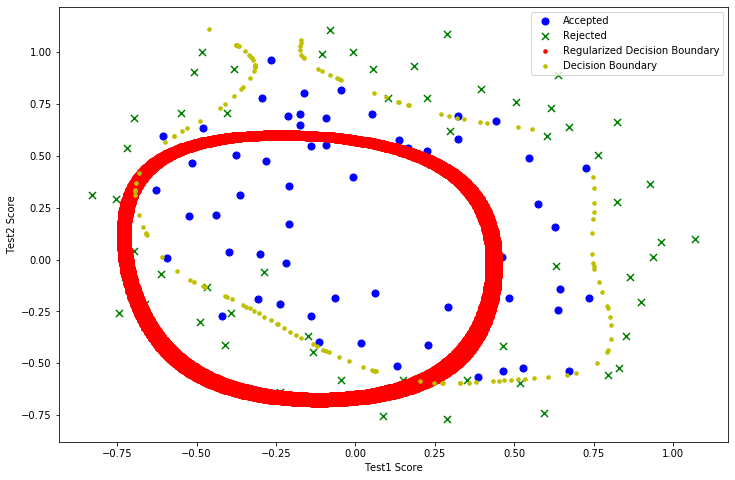

In [29]:
draw_boundary(6, l=100)